# Kaggle's Spaceship Tiitanic Kaggle Competition 

### From "How To Score ~80% Accuracy in Kaggle’s Spaceship Titanic Competition" by Zaynab Awofeso (ebunoluwazaynab on Github)
https://medium.com/codex/how-to-score-80-accuracy-in-kaggles-spaceship-titanic-competition-using-random-forest-classifier-e7d06ce25bad

##### Import required libraries

In [188]:
# For loading Packages
import pandas as pd
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
from scipy.stats import randint

# To build and evaluate model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

##### Read Data

In [189]:
# Read train data
train_df = pd.read_csv("train.csv")
# Read test data
test_df = pd.read_csv("test.csv")

In [190]:
# copy of train and test data to prevent making changes to the original datasets
train_df_1 = train_df.copy()
test_df_1 = test_df.copy()

In [191]:
# view columns of the train data
train_df_1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [192]:
# view columns of the test data
test_df_1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [193]:
# print datatypes of the train data
train_df_1.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [194]:
# Print shape of train data
print("The shape of the train dataset is: ", train_df_1.shape)

# Print shape of test data
print("The shape of the test dataset is: ", test_df_1.shape)

The shape of the train dataset is:  (8693, 14)
The shape of the test dataset is:  (4277, 13)


##### Univariate Analysis

###### Target Variable 

In [195]:
# Normalize is set to true to print proportions instead of number
train_df_1['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

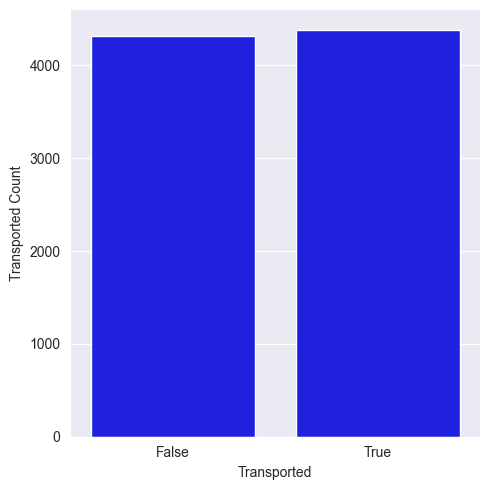

In [196]:
# Visualize target variable
ax = sns.catplot(x = "Transported", data = train_df_1, kind = "count", color = "b")
ax.set_axis_labels("Transported", "Transported Count")

###### Independent Variables (Categorical)

<AxesSubplot: title={'center': 'VIP'}>

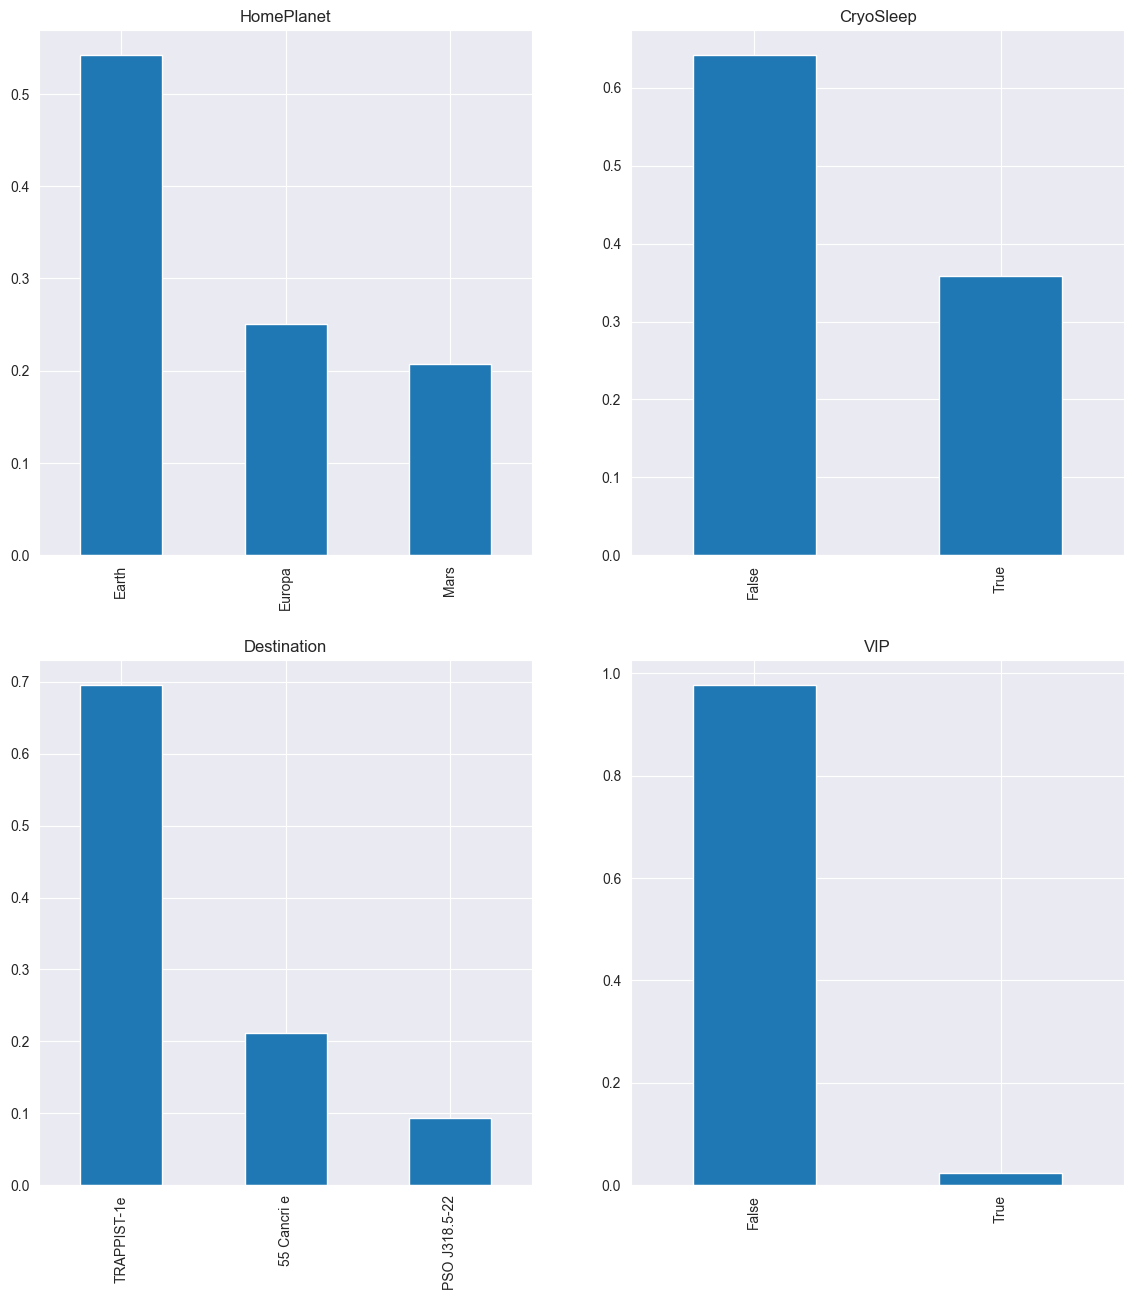

In [197]:
# Visualize independent categorical features
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
train_df_1['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
train_df_1['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
train_df_1['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
train_df_1['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

###### Cabin Variable

In [198]:
# Extract CabinDeck, CabinNo. and CabinSide feature from Cabin
train_df_1[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_1["Cabin"].str.split('/', expand = True)

<AxesSubplot: title={'center': 'CabinSide'}>

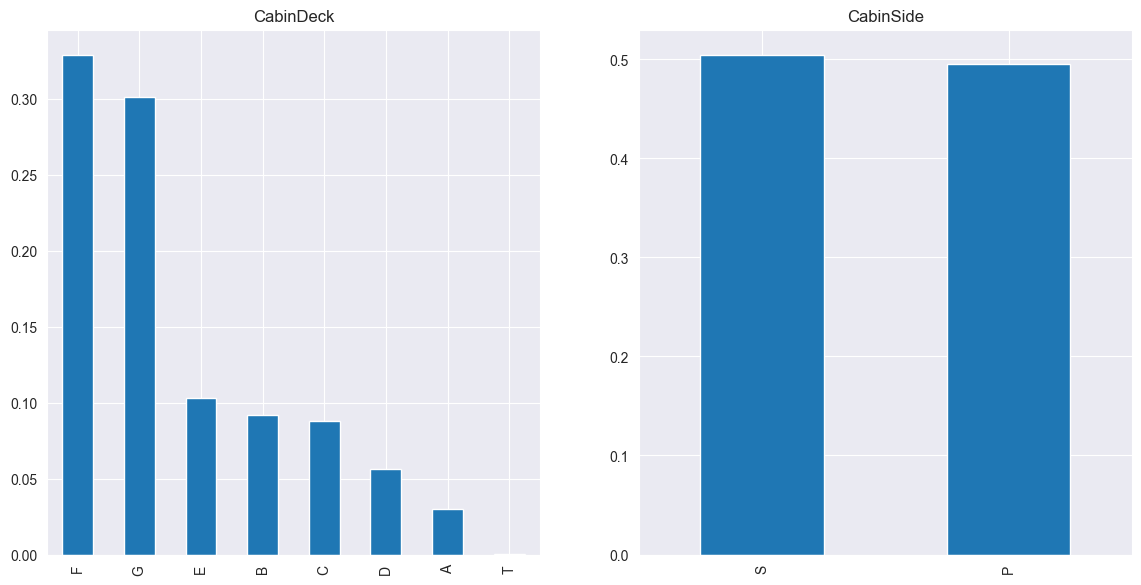

In [199]:
# Visualize cabin feature
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
train_df_1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_1['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')

##### Age Variable

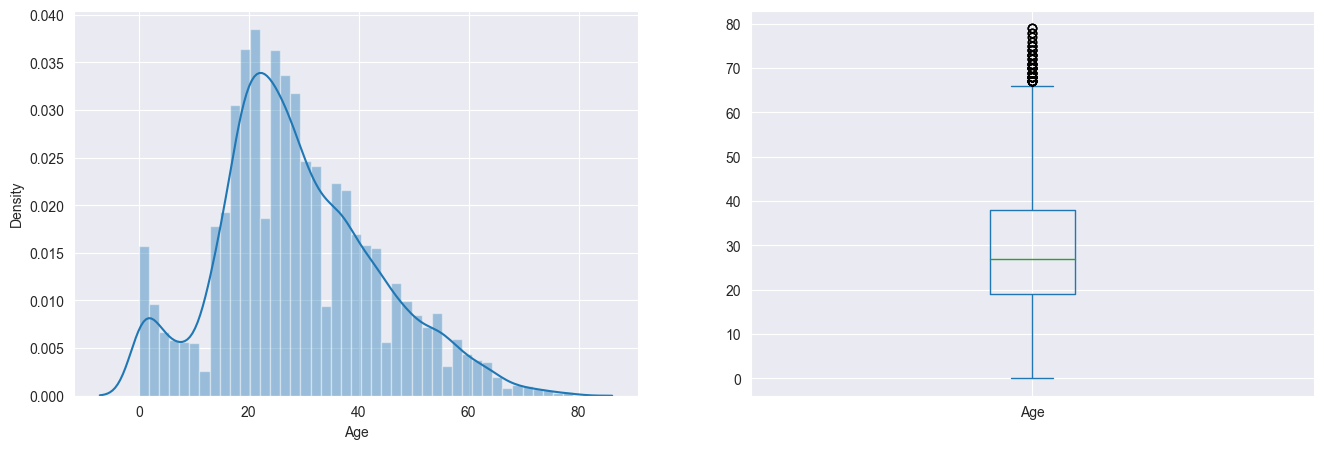

In [200]:
# Visualize Age variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Age']);
plt.subplot(122)
train_df_1['Age'].plot.box(figsize = (16, 5));
plt.show()

##### RoomService Variable

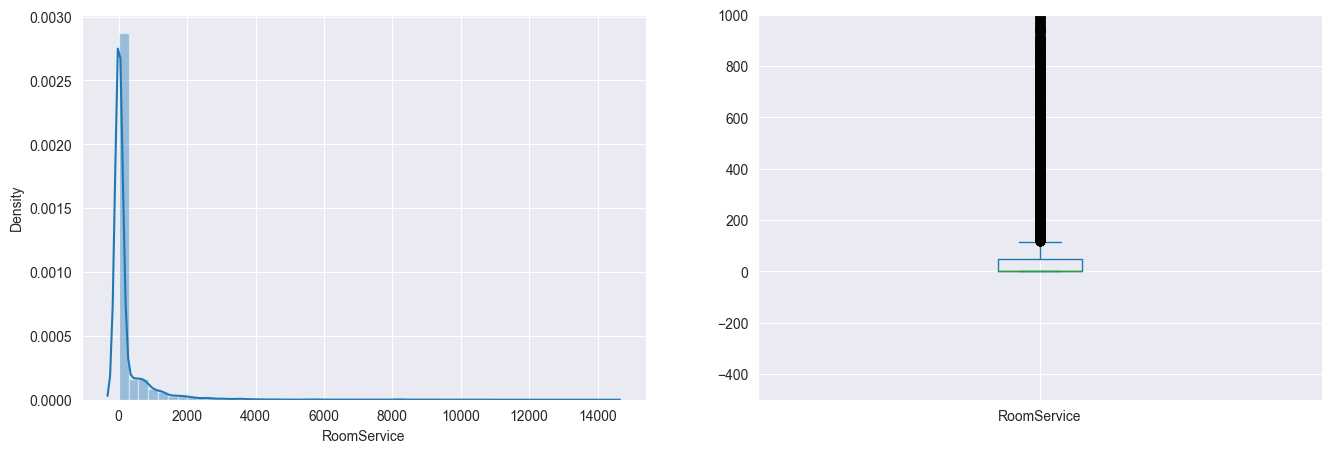

In [201]:
# Visualize RoomService variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['RoomService']);
plt.subplot(122)
train_df_1['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

##### Spa

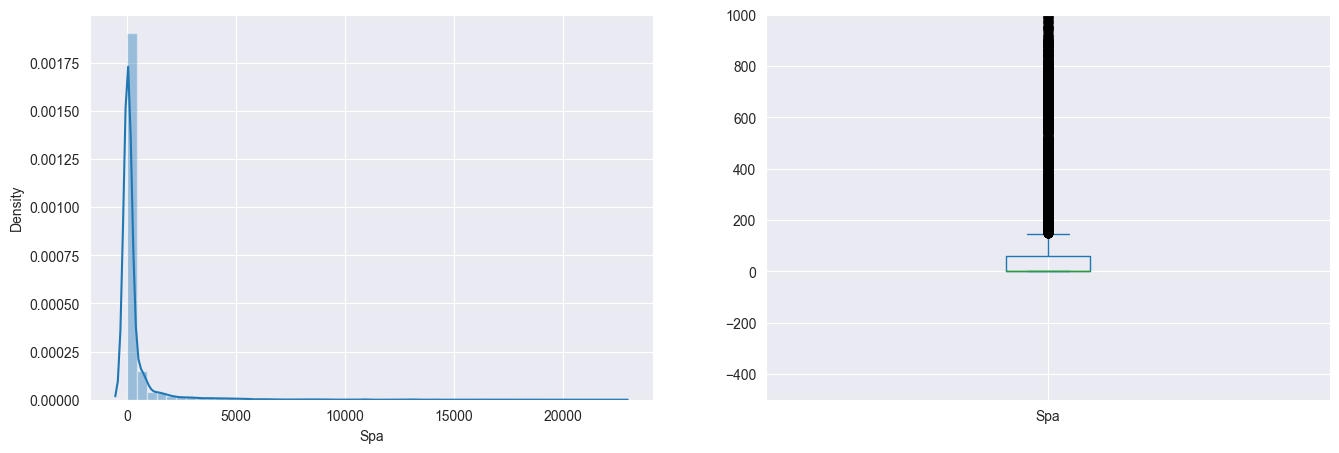

In [202]:
# Visualize Spa variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Spa']);
plt.subplot(122)
train_df_1['Spa'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

##### VRDeck

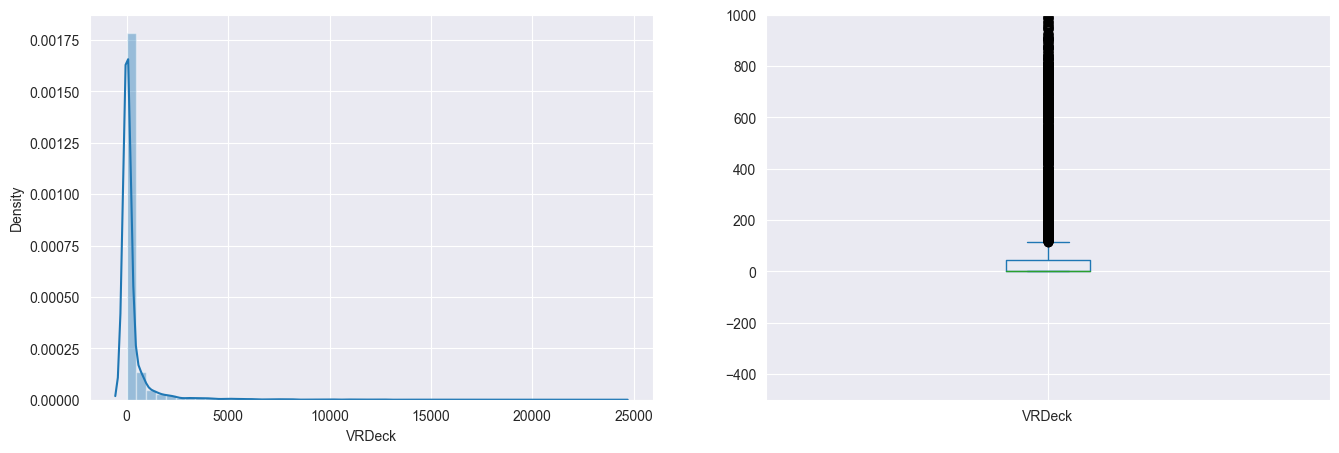

In [203]:
# Visualize VRDeck variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['VRDeck']);
plt.subplot(122)
train_df_1['VRDeck'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

##### FoodCourt

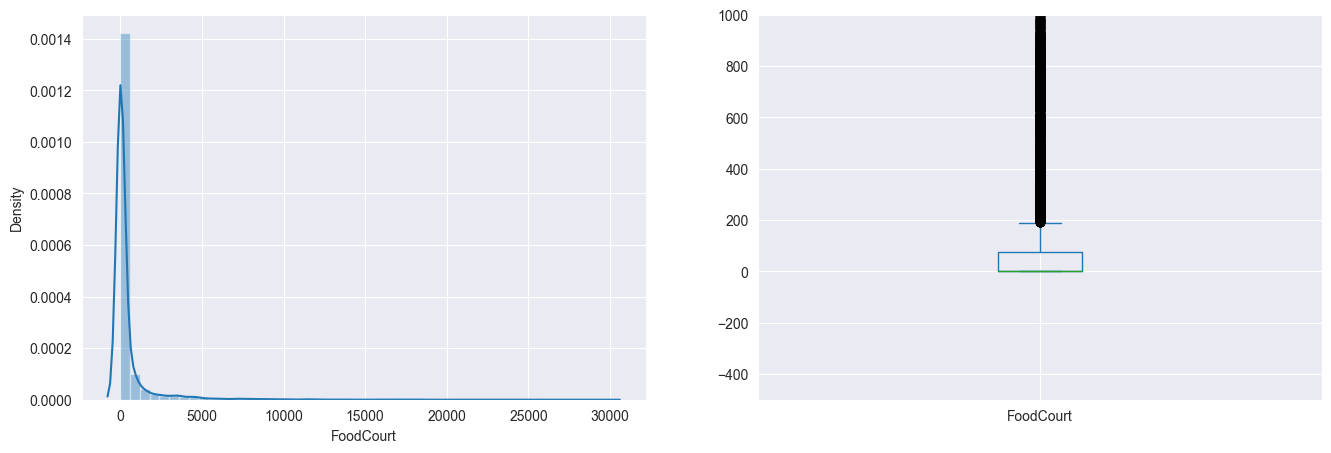

In [204]:
# Visualize FoodCourt variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['FoodCourt']);
plt.subplot(122)
train_df_1['FoodCourt'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

##### ShoppingMall

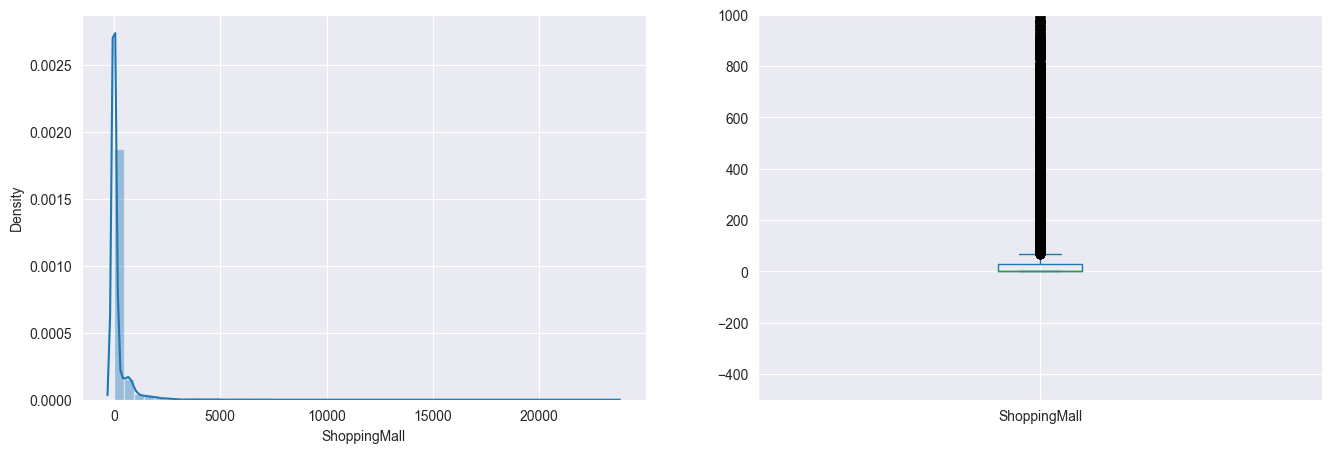

In [205]:
# Visualize ShoppingMall variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['ShoppingMall']);
plt.subplot(122)
train_df_1['ShoppingMall'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

##### Bivariate Analysis

In [206]:
HomePlanet_Transported = train_df_1.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']

CryoSleep_Transported = train_df_1.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId']

Destination_Transported = train_df_1.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = Destination_Transported['Transported'] / Destination_Transported['PassengerId']

VIP_Transported = train_df_1.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = VIP_Transported['Transported'] / VIP_Transported['PassengerId']

<AxesSubplot: xlabel='VIP', ylabel='TransportedPercentage'>

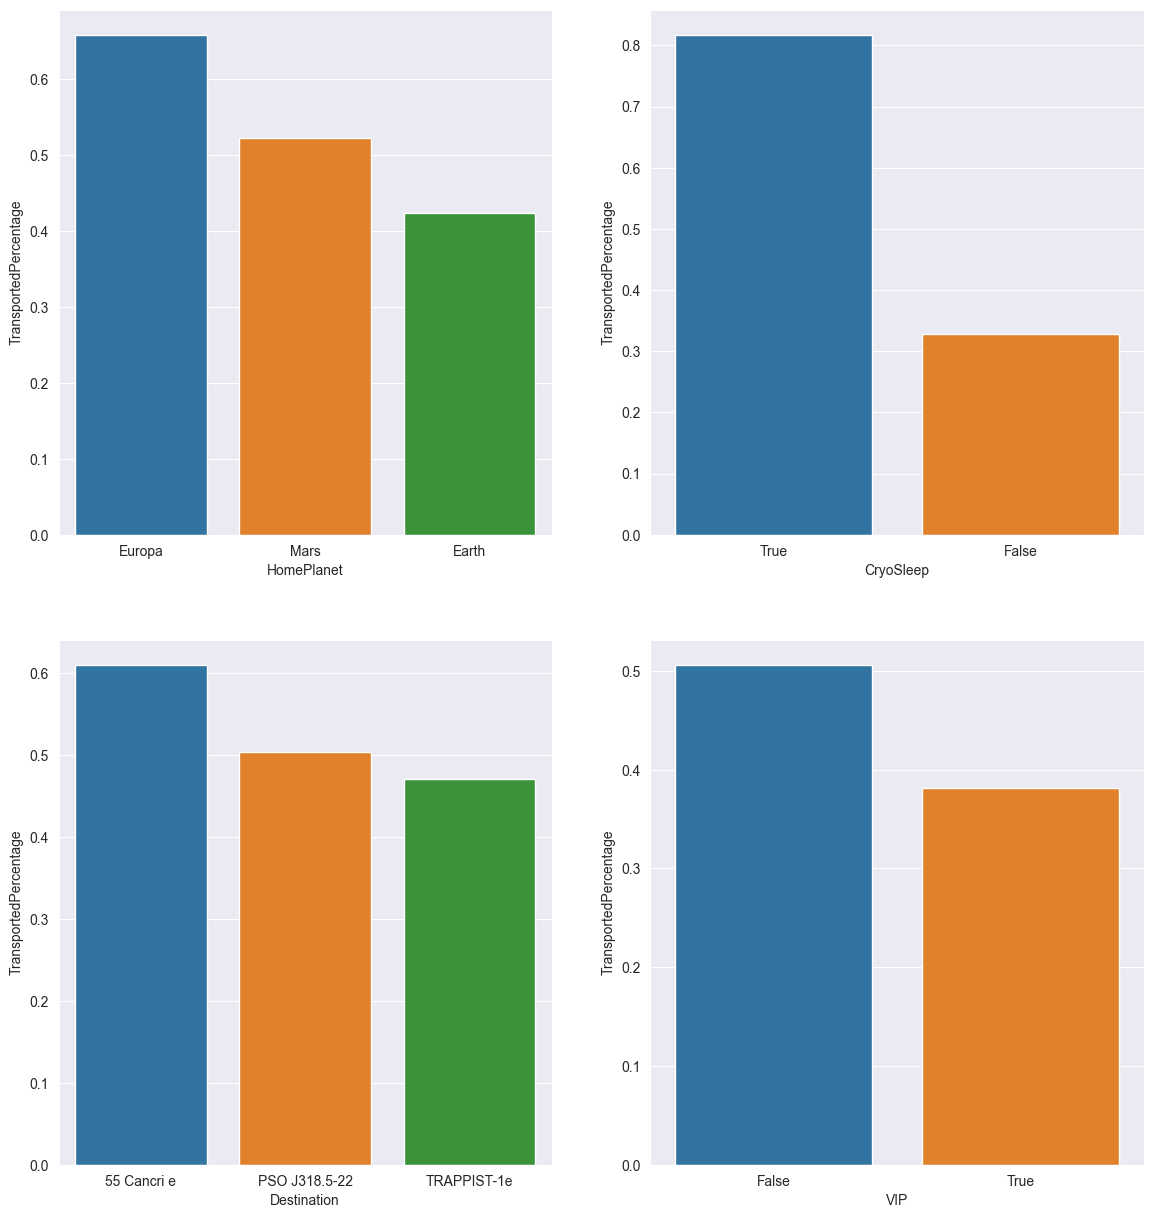

In [207]:
# Visaulize categorical features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "HomePlanet", y = "TransportedPercentage", data = HomePlanet_Transported, order = HomePlanet_Transported.sort_values('TransportedPercentage', ascending = False).HomePlanet)
plt.subplot(222)
sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep)
plt.subplot(223)
sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination)
plt.subplot(224)
sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP)

In [208]:
CabinDeck_Transported = train_df_1.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']

CabinSide_Transported = train_df_1.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']

<AxesSubplot: xlabel='CabinSide', ylabel='TransportedPercentage'>

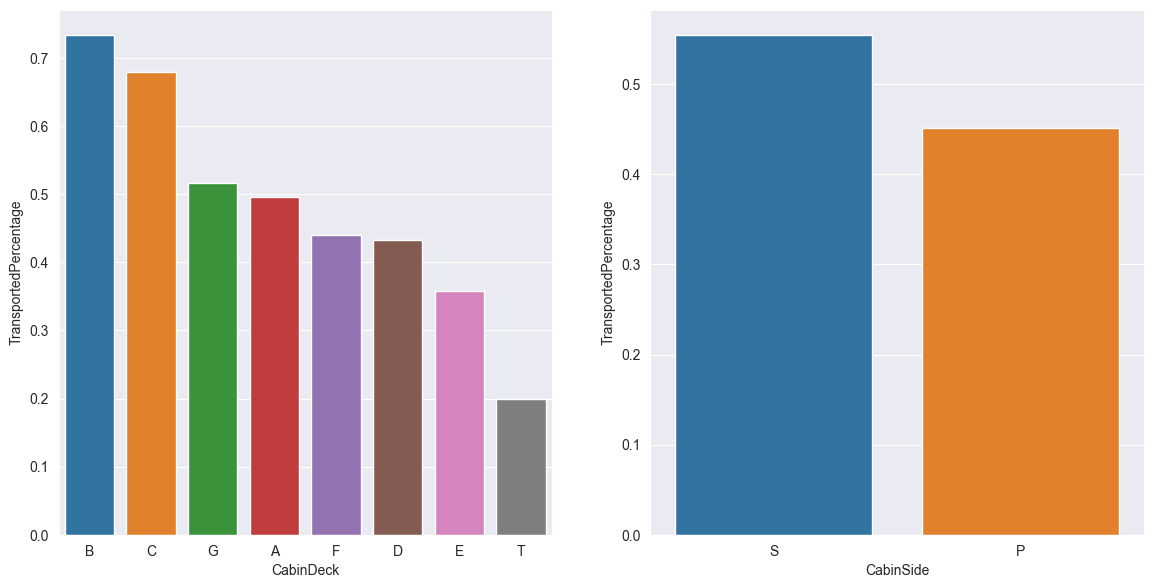

In [209]:
# Visualize Cabin features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck)
plt.subplot(222)
sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide)

In [210]:
# Extract PassengerGroup column from PassengerId column
train_df_1["PassengerGroup"] = train_df_1["PassengerId"].str.split('_', expand = True)[0]

# Create dataframe -No_People_In_PassengerGroup that contains the PassengerGroup and the no passengers in the group 
No_People_In_PassengerGroup = train_df_1.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})

train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "NoInPassengerGroup"]], how = 'left', on = ['PassengerGroup'])
# create dataframe NoInPassengerGroup_Transported that has No of passengers in a group transported and the percentage of passengers in a group transported
NoInPassengerGroup_Transported = train_df_1.groupby('NoInPassengerGroup').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

NoInPassengerGroup_Transported['TransportedPercentage'] = NoInPassengerGroup_Transported['Transported'] / NoInPassengerGroup_Transported['PassengerId']

<AxesSubplot: xlabel='NoInPassengerGroup', ylabel='TransportedPercentage'>

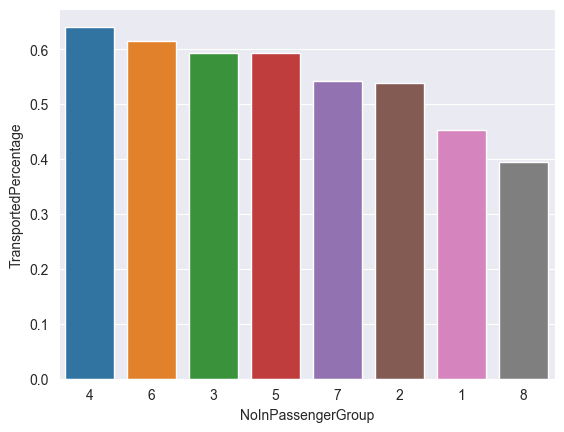

In [211]:
# Visualize PassengerGroup vs transported
sns.barplot(x = "NoInPassengerGroup", y = "TransportedPercentage", data = NoInPassengerGroup_Transported, order = NoInPassengerGroup_Transported.sort_values('TransportedPercentage', ascending = False).NoInPassengerGroup)

In [212]:
No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

IsAlone_Transported = train_df_1.groupby('IsAlone').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Transported that contains percentage of passengers transported Alone or Not Alone
IsAlone_Transported['TransportedPercentage'] = IsAlone_Transported['Transported'] / IsAlone_Transported['PassengerId']

<AxesSubplot: xlabel='IsAlone', ylabel='TransportedPercentage'>

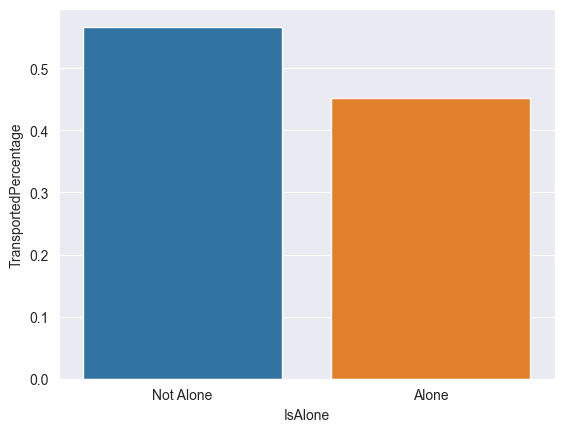

In [213]:
# Visualize IsAlone vs transported
sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone)

In [214]:
# Extract FamilyName column from Name column
train_df_1["FamilyName"] = train_df_1["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the no of relatives in a Family
NoRelatives = train_df_1.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

train_df_1 = train_df_1.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])

train_df_1["FamilySizeCat"] = pd.cut(train_df_1.NoRelatives, bins = [0, 2, 5, 10, 18], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 18'])

# create dataframe FamilySizeCat_Transported that has the Family Size Category and the percentage transported
FamilySizeCat_Transported = train_df_1.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySizeCat_Transported['TransportedPercentage'] = FamilySizeCat_Transported['Transported'] / FamilySizeCat_Transported['PassengerId']

<AxesSubplot: xlabel='FamilySizeCat', ylabel='TransportedPercentage'>

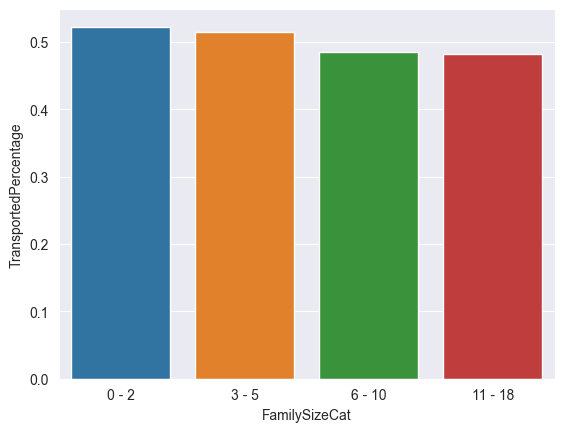

In [215]:
# Visualize FamilySizeCat vs transported
sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat)

In [216]:
# Create total spending feature
train_df_1["TotalSpendings"] = train_df_1["FoodCourt"] + \
                                 train_df_1["ShoppingMall"] + \
                                 train_df_1["RoomService"] + \
                                 train_df_1["Spa"] + \
                                 train_df_1["VRDeck"]

(-800.0, 12000.0)

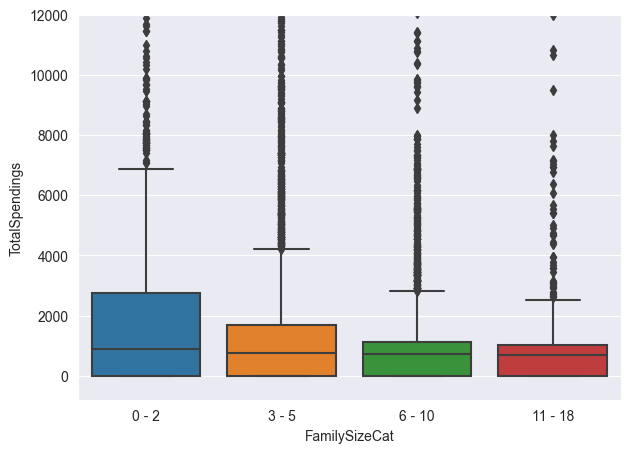

In [217]:
# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "FamilySizeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

(-50.0, 200.0)

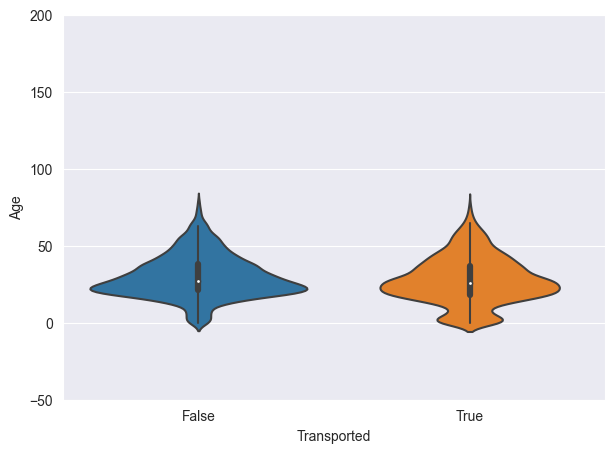

In [218]:
# Transported vs Age
plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["Age"])
plt.ylim([-50, 200])

In [219]:
# Extract Age Category column from Age column
train_df_1["AgeCat"] = pd.cut(train_df_1.Age, bins = [0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0], labels = ['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 61', '61 - 80'])

AgeCat_Transported = train_df_1.groupby('AgeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe AgeCat_Transported that has the Age Category and the percentage transported
AgeCat_Transported['TransportedPercentage'] = AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']

<AxesSubplot: xlabel='AgeCat', ylabel='TransportedPercentage'>

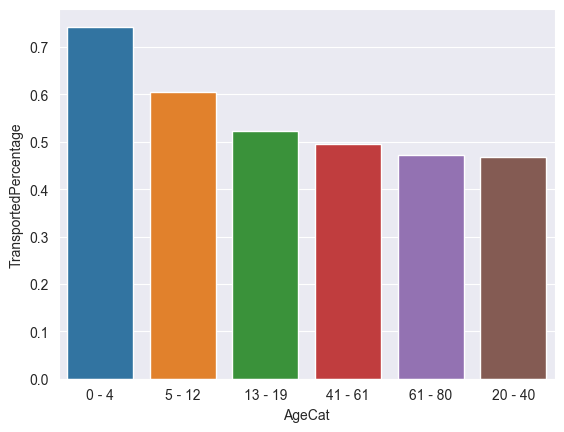

In [220]:
# Visualize AgeCat vs transported
sns.barplot(x = "AgeCat", y = "TransportedPercentage", data = AgeCat_Transported, order = AgeCat_Transported.sort_values('TransportedPercentage', ascending = False).AgeCat)

(-800.0, 2000.0)

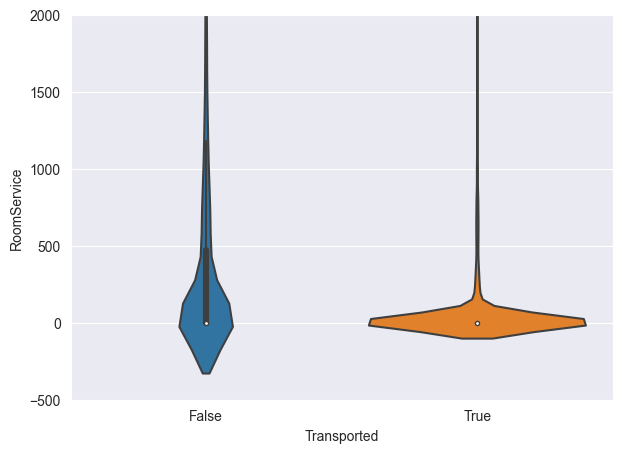

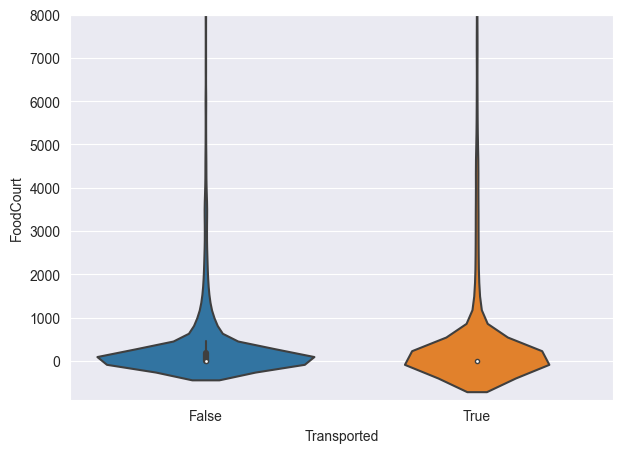

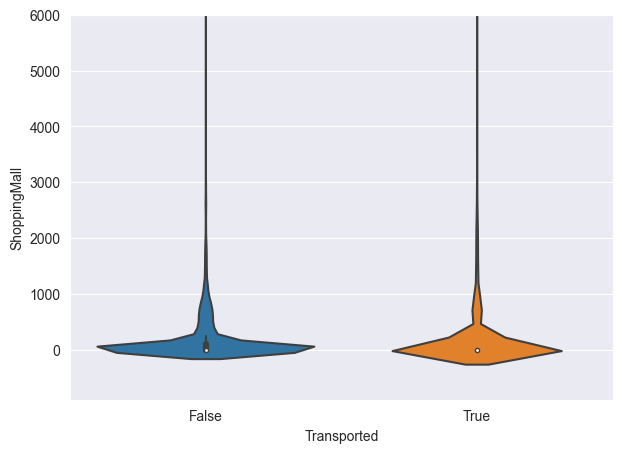

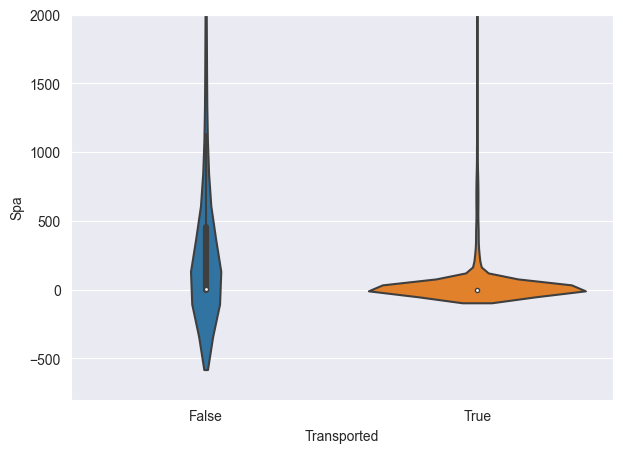

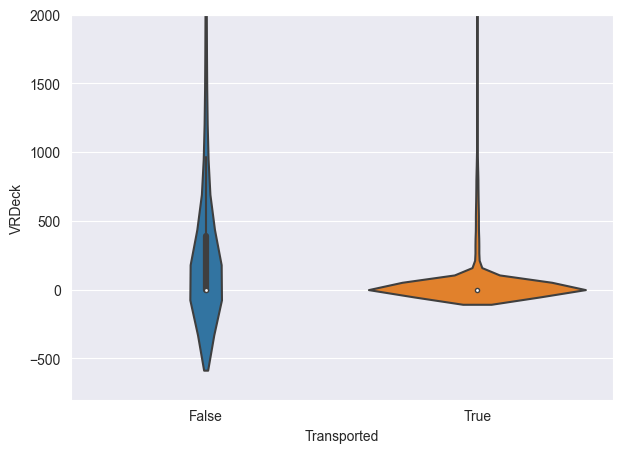

In [221]:
#  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
plt.figure(figsize = (7, 5)) 
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["RoomService"])
plt.ylim([-500, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["FoodCourt"])
plt.ylim([-900, 8000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["ShoppingMall"])
plt.ylim([-900, 6000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["Spa"])
plt.ylim([-800, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["VRDeck"])
plt.ylim([-800, 2000])

(-900.0, 14000.0)

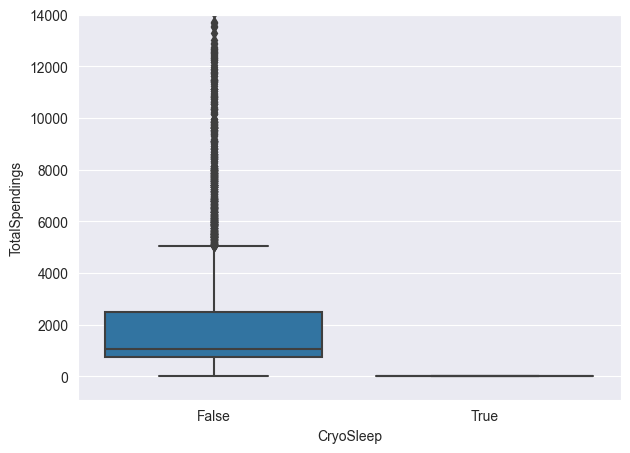

In [222]:
# CryoSleep vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "CryoSleep", y = "TotalSpendings")
plt.ylim([-900, 14000])

(-800.0, 12000.0)

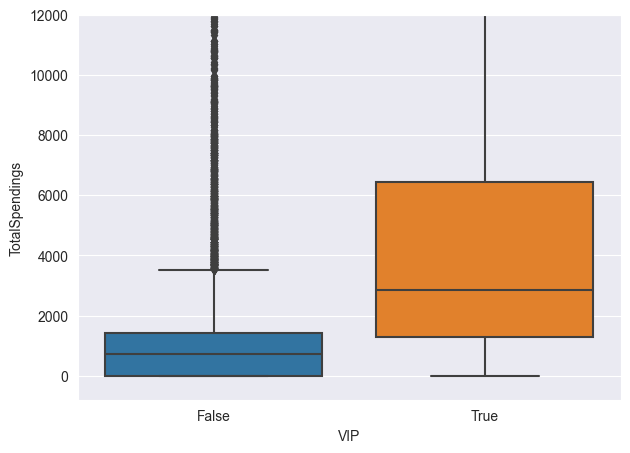

In [223]:
# VIP vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "VIP", y = "TotalSpendings")
plt.ylim([-800, 12000])

(-800.0, 12000.0)

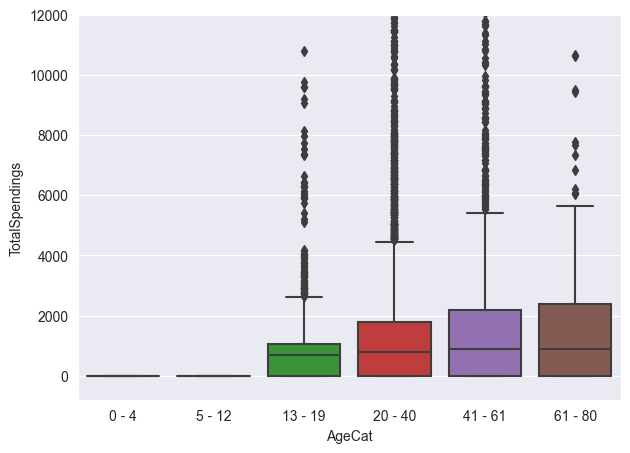

In [224]:
# AgeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "AgeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

#### Cleaning and Preprocessing

In [225]:
train_df_1.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported', 'CabinDeck', 'CabinNo.',
       'CabinSide', 'PassengerGroup', 'NoInPassengerGroup', 'IsAlone',
       'FamilyName', 'NoRelatives', 'FamilySizeCat', 'TotalSpendings',
       'AgeCat'], dtype=object)

In [226]:
train_df_2 = train_df_1.copy()

# drop features created during EDA
train_df_2 = train_df_2.drop(["PassengerGroup",
                              "CabinDeck",
                              "CabinNo.",
                              "CabinSide",
                              "FamilyName",
                              "NoRelatives",
                              "NoInPassengerGroup",
                              "AgeCat",
                              "FamilySizeCat", 
                              "TotalSpendings",
                              "IsAlone"], axis = 1)

In [227]:
# save target variable in train dataset and save it in target
target = train_df_2["Transported"]

# save test PassengerId in test_id
test_id = test_df_1["PassengerId"]

# drop Transported variable from the train set
train_df_3 = train_df_2.drop(["Transported"], axis = 1)

# Join the train and test set 
data = pd.concat([train_df_3, test_df], axis = 0).reset_index(drop = True)

In [228]:
# Print shape of data
print(data.shape)

# Print first 5 rows of data
data.head()

(12970, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [229]:
Missing_data = pd.DataFrame()
Missing_data["NoMissing"] = data.isna().sum()
Missing_data["MissingPercentage"] = round(Missing_data * 100 / data.shape[0], 3)
Missing_data


,NoMissing,MissingPercentage
PassengerId,0,0.000
HomePlanet,288,2.221
CryoSleep,310,2.390
Cabin,299,2.305
Destination,274,2.113
Age,270,2.082
VIP,296,2.282
RoomService,263,2.028
FoodCourt,289,2.228
ShoppingMall,306,2.359


In [230]:
# view percentage of values missing in each column
round(data.isna().sum() * 100/data.shape[0], 3)

PassengerId     0.000
HomePlanet      2.221
CryoSleep       2.390
Cabin           2.305
Destination     2.113
Age             2.082
VIP             2.282
RoomService     2.028
FoodCourt       2.228
ShoppingMall    2.359
Spa             2.190
VRDeck          2.066
Name            2.267
dtype: float64

In [231]:
# get categorical columns in train dataset with missing values and store in missing_cat_cols
data_1 = data.copy()

list_missing_cat_columns = list((data_1.select_dtypes(['object', 'category']).isna().sum() > 0).index)
list_missing_cat_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [232]:
# Fill Categorical columns in data with mode
for col in list_missing_cat_columns:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

In [233]:
## Fill missing values for numeric columns

# get numeric columns with missing values and store in lst_missing_numeric_col
list_missing_numeric_col = list((data_1.select_dtypes(np.number).isna().sum() > 0).index)
list_missing_numeric_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [234]:
# Filling NaNs based on Age
def fill_nans_by_age_and_cryosleep(df):
    df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
    df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
    df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
    df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
    df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])
    
    return df

In [235]:
data_1 = fill_nans_by_age_and_cryosleep(data_1)

In [236]:
# Fill numeric columns in train dataset with mean
for col in list_missing_numeric_col:
    data_1[col] = data_1[col].fillna(data_1[col].mean())

In [237]:
data_1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [238]:
# clip outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df      

In [239]:
data_1 = clipping_quantile(data_1, None, 0.99)

#### Feature Extraction and Feature Selection

In [240]:
def extract_features(df):
    df["PassengerGroup"] = (df["PassengerId"].str.split('_', expand = True))[0]
    
    No_People_In_PassengerGroup = df.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
    No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})
    # Create IsAlone feature
    No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
    df = df.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])
    
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]
    
    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"] 
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
    
    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']
    
    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])
    
    df["FamilyName"] = df["Name"].str.split(' ', expand = True)[1]
    # Create NoRelatives feature
    NoRelatives = df.groupby('FamilyName')['PassengerId'].count().reset_index()
    NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})
    
    df = df.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])
    # Create FamilySizeCat feature
    df["FamilySizeCat"] = pd.cut(df.NoRelatives, bins = [0, 2, 5, 10, 300], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 208'])
    
    return df

data_2 = data_1.copy()
data_2 = extract_features(data_2)

In [241]:
data_3 = data_2.copy()
irrelevant_columns = ["Cabin", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "FamilyName", "PassengerGroup"]
data_3 = data_3.drop(irrelevant_columns, axis = 1)

In [242]:
data_3.shape

(12970, 15)

In [243]:
# Categorical Encoding
data_3 = pd.get_dummies(data_3, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide', 'IsAlone'])

# Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition', 'FamilySizeCat']:
    data_3[col], _ = data_3[col].factorize()

In [244]:
# split the data back to get the train and test data
data_4 = data_3.copy()
train_data_final = data_4.loc[:train_df.index.max(),  :].copy()
test_data_final = data_4.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

In [245]:
# print shape of final train data
print(train_data_final.shape)

# print shape of final train data
print(test_data_final.shape)

(8693, 23)
(4277, 23)


In [246]:
X = train_data_final.copy()

# save target variable in in y
y = target.astype(int)

In [247]:
# Univariate feature selection
chi_selector = SelectKBest(chi2, k = 22).fit(X, y)

chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns
chi_feature

Index(['Age', 'CabinDeck', 'DeckPosition', 'Regular', 'Luxury',
       'TotalSpendings', 'DeckAverageSpent', 'NoRelatives', 'FamilySizeCat',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'CabinSide_P',
       'CabinSide_S', 'IsAlone_Alone', 'IsAlone_Not Alone'],
      dtype='object')

In [248]:
X = X[chi_feature]

In [249]:
# baseline model
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(X, y)

RandomForestClassifier(random_state=1)

In [250]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X, y, cv = 20, scoring = "accuracy")

In [251]:
# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.7889098998887654
0.01911345656998776


In [252]:
# provide range for max_depth from 1 to 20 with an interval of 2 
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(X, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [253]:
# build final model with these optimized values 
model_final = RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

# fit model on X and y
model_final.fit(X, y)

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [254]:
# store accuracy of each final model's prediction in result
result_final = cross_val_score(model_final, X, y, cv = 20, scoring = "accuracy")

In [255]:
# print mean and standard deviation of the accuracy of the final model

print(np.mean(result_final))
print(np.std(result_final))

0.8047907728163567
0.018872624931449773


In [256]:
# use final model to predict on the test data and store predictions in prediction 
prediction = model_final.predict(test_data_final[chi_feature])

In [257]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [258]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_df_1["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

# replacing 0 with False and 1 with True
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})

# convert submission dataframe to .csv format
pred_df.to_csv("submission_2023-04-19_1.csv", index = False)

<AxesSubplot: >

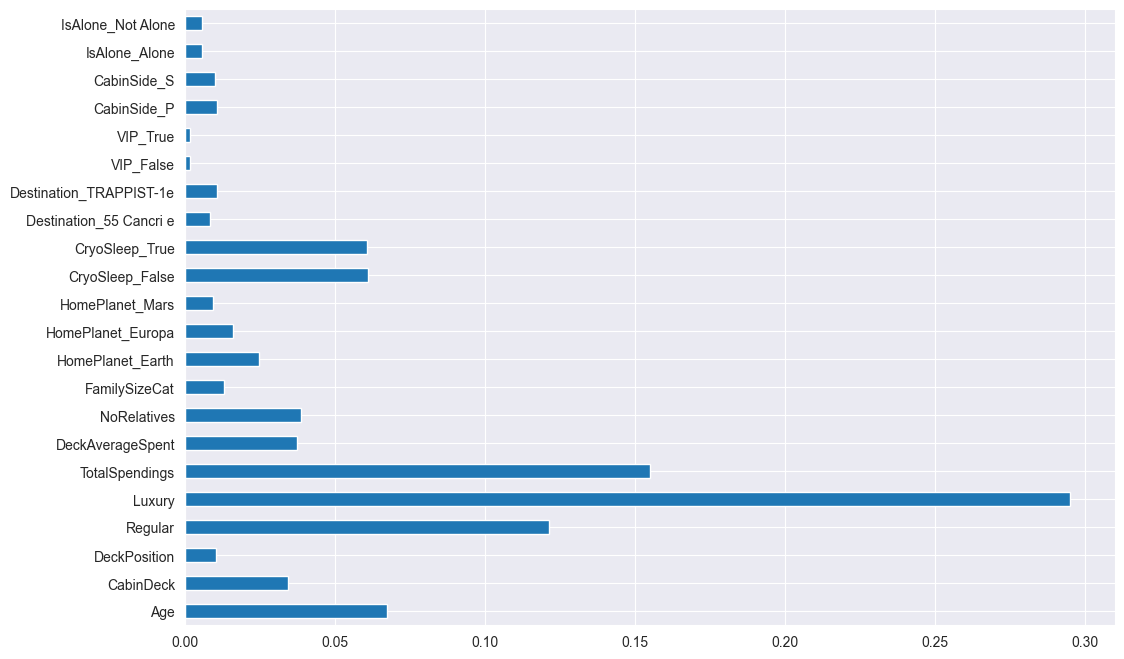

In [259]:
# plot feature importances
importances = pd.Series(model_final.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize = (12, 8))